## Experimental Bias Variance Tradeoff
### Step 1: Fitting and Plotting

In this exercise we fit cos(x) using a few  data points **sampled indepently and uniformly at random** from $[0,2\pi]$ using the following two models (using least squares error).
- model 1: m1 - fit the best linear model to the data $(w_1 x + w_0)$
- model 2: m2 - fit the best second order polynomial of the the data $(w_2x^2 +w_1x + w_0)$

    
We have already a large part of the code so we can get to main point without being bogged down with python intricacies. 

You need to to write the code that takes a random data sample  (np.array of shape (datasize, ))
and create training data that works for model m1 and m2 respectively and fit the two models using least squares cost (Linear Regression)
    
**Task:**
In the code cell below you need to make/compute/fill**
- train_set_m1 - input data to model m1 (np.array shape: (datasize, 2) (why?)
- train_set_m2 - input data to model m2 (np.array shape: (datasize, 3) (why?)
- train_target - target data (should be (x, cos(x))) 
- w_opt_m1 - learned parameters using model 1 on data train_set_m1 and target train_target
- w_opt_m2 - learned parameters using model 2 on data train_set_m2 and target train_taget

Run the next cell to see the results.
    
HINT: Look at the code for making test sets for train_set_m1 and train_set_m2
HINT: la.pinv may come in handy for computing w_opt_m1 and w_opt_m2

**Task:** Try changing the datasize parameter. What do you see?

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import numpy.random as rd



def intro(datasize=3,  examples=(4, 4)):
    """ 
    Fit cos(x) and plot on data size <data_size> randomly chosen from 0 -> 2pi 
    using models:
    model1: m1 fit the best line between the points (ax + b)
    model2: m2 fit the best second order polynomial of the the data (ax^2 +bx + c)
    
    make a grid of size <examples> and plot examples[0] * examples[1] 
    
    We have written most of the code. 
    You need to to write the code that takes a random data sample of size data size (np.array of shape (datasize, ))
    and make training data that works for model1 and model2 and fit the two models (least squares - hint linear regression)
    
    You need to make compute/fill
    - train_set_m1 - input data to model m1 (np.array shape: (datasize, 2) (why?)
    - train_set_m2 - input data to model m2 (np.array shape: (datasize, 3) (why?)
    - train_target - target data (should be cos(x)) 
    - w_opt_m1 - learned parameters using model 1 on data train_set_m1 and target train_target
    - w_opt_m2 - learned parameters using model 2 on data train_set_m2 and target train_taget

    
    HINT: Look at the code for making test sets for train_set_m1 and train_set_m2
    HINT: la.pinv may come in handy for computing w_opt_m1 and w_opt_m2
    """
    data_range = 2*np.pi
    plot_points = 1000
    x_data = np.linspace(0, data_range, plot_points)
    
    # Containers for training set 
    train_set_m1 = np.ones((datasize, 2))
    train_set_m2 = np.ones((datasize, 3))
    
    # container for test sets
    test_set_m1 = np.ones((plot_points, 2))
    test_set_m1[:,1] = x_data
    test_set_m2 = np.ones((plot_points, 3))
    test_set_m2[:,1] = x_data
    test_set_m2[:,2] = x_data **2
    
    # figures and axes to plot on
    fig, axes = plt.subplots(examples[0], examples[1], figsize=(20, 16))
    for i in range(examples[0]):
        for j in range(examples[1]):
            ax = axes[i][j]
            train_dat = rd.rand(datasize)*data_range
            best_model_m1 = None
            best_model_m2 = None
            train_target = None
            ### YOUR CODE HERE
            train_set_m1[:, 1] = train_dat
            train_set_m2[:, 1] = train_dat
            train_set_m2[:, 2] = train_dat **2
            train_target = np.cos(train_dat)            
            w_opt_m1 = np.dot(la.pinv(train_set_m1), train_target)
            w_opt_m2 = np.dot(la.pinv(train_set_m2), train_target)
            ### END CODE
            ax.plot(x_data, np.dot(test_set_m1, w_opt_m1), 'b-', linewidth=2, label='line') # plot model 
            ax.plot(x_data, np.dot(test_set_m2, w_opt_m2),'g-',linewidth=2, label='2 order poly') # plot model 2
            ax.plot(x_data, np.cos(x_data), 'r-', linewidth=2, label='target') # plot the target function
            ax.plot(train_dat, train_target, 'ks', markersize=6) # plot the sampled data set
            ax.legend()
            ax.set_xlim(0, data_range)
            ax.set_ylim(-3, 3)


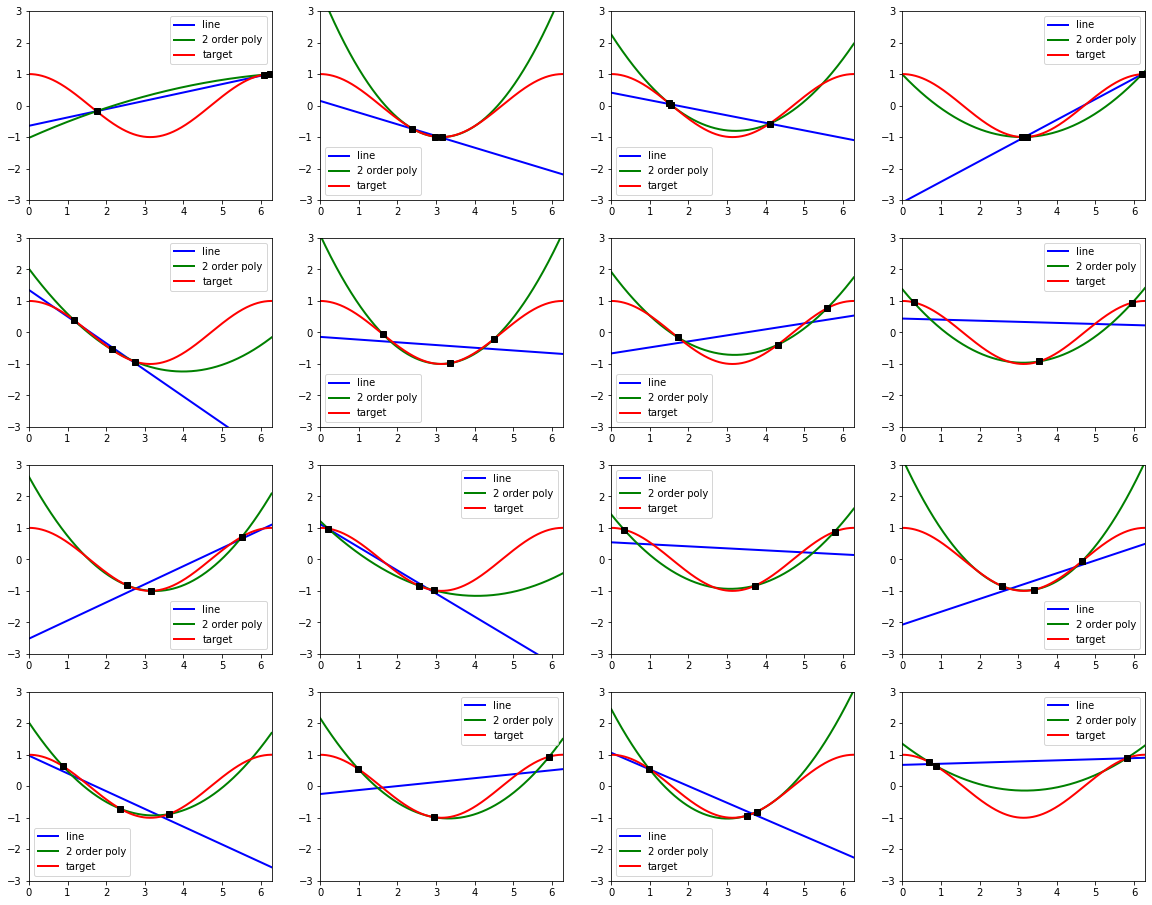

In [4]:
intro()
plt.show()    

## Step 2: Experimentally evaluate the bias variance tradeoff for models used above
         
The setup and models are as above, line and polynomial fitting $\cos(x)$ on $[0, 2\pi]$ using a few  data points.
Now your task is to experimentally evaluate the Bias Variance tradeoff using  sampling.
    
**Task:** 
The steps are:
1. repeat fits_to_plot times
  - Generate random data - as above
  - Fit the two models - as above
  - plot the two models, blue for line, green for polynomial - as above except all on same plot/axes
  - compute $E_\textrm{in}$ and $E_\textrm{out}$ for the two fitted models ($E_\textrm{out}$ is estimated by sampling) and accumulate
    
2. Compute the average $E_\textrm{in}$ and $E_\textrm{out}$ for the two models using the accumulated values - print to screen
3. Compute the average model for m1, m2 - print to screen, plot to axes
4. Compute/Estimate the bias variance tradeoff for the two models - print to screen - see if it makes sense (only need to compute bias since we have estimated  $E_\textrm{out}$  already)
    
We have written some of the code so you have to fill in the rest. 
    
HINT: Look at the code above
HINT: la.pinv may come in handy for computing w_opt_m1 and w_opt_m2
HINT: To compute bias variance tradeoff when we know eout all you need to know is the bias which is "easy" to estimate from the average model and the test data
    
    
Try with datasize 2, 3, 5, 10 what do you see?

If we did not use the trick to compute the variance how could we alter our code to estimate the variance directly?

In [5]:
def bias_var_exp(datasize=10, fits_to_plot=2000):
    """ Experimentally evaluate the bias variance tradeoff for models used above
         
    The models are as above, line and polynomial fitting cos on 0, 2pi using <data_size> data points.
    Now we need to experimentally evaluate bias variance tradeoff using standard sampling.
    
    The steps are:
    repeast fits_to_plot times
     - Generate random data - as above
     - Fit the two models - as above
     - plot the two models, blue for line, green for polynomial - as above
     - compute ein and eout for the two fitted models (eout is estimated by sampling) and accumulate
    
    Compute the average ein and eout for the two models - print to screen
    Compute the average model for m1, m2 - print to screen, plot to axes
    Compute/Estimate the bias variance tradeoff for the two models - print to screen -
    see if it makes sense (only compute bias since we have estimated eout already)
    
    
    The strategy is 
    We have written some of the code. 
    
    
    HINT: Look at the code above
    HINT: la.pinv may come in handy for computing w_opt_m1 and w_opt_m2
    HINT: To compute bias variance tradeoff when we know eout all you need to know is the bias which is "easy" to 
    estimate from the average model and the test data
    """
    print('Bias Variance Experiment: Lines vs 2D Polynomial for fitting cos(x) on [0-2pi]')
    data_range = 2*np.pi
    plot_points = 1000
    x_data = np.linspace(0, data_range, plot_points)

    # Containers for training set 
    train_set_m1 = np.ones((datasize, 2))
    train_set_m2 = np.ones((datasize, 3))
    
    # containers for test set
    test_set_m1 = np.ones((plot_points, 2))
    test_set_m1[:,1] = x_data
    test_set_m2 = np.ones((plot_points, 3))
    test_set_m2[:,1] = x_data
    test_set_m2[:,2] = x_data **2
    test_target = np.cos(x_data)

    
    # figure and axes to plot on
    fig, ax = plt.subplots(figsize=(20, 16))

    # Accumulatation variables
    ein_m1=0  # accumulated ein for model 1
    eout_m1=0  # accumulated eout for model 2
    ein_m2=0  # accumulated ein for model 1
    eout_m2=0  # accumulated eout for model 2
    
    # containers for average model
    w1_bar = np.zeros((2,))
    w2_bar = np.zeros((3,))
    for i in range(1, fits_to_plot):
        dat = rd.rand(datasize)*data_range
        ### YOUR CODE HERE - compute train_set_m1, train_set_m2, target, best_model_m1, best_model_m2
        train_set_m1[:, 1] = dat
        train_set_m2[:, 1] = dat
        train_set_m2[:, 2] = dat * dat
        target = np.cos(dat)
        best_model_m1 = np.dot(la.pinv(train_set_m1), target)
        best_model_m2 = np.dot(la.pinv(train_set_m2), target)
        ### END CODE

        # Use these to estiamte eout!
        h1 = np.dot(test_set_m1, best_model_m1)
        h2 = np.dot(test_set_m2, best_model_m2)        
        ### YOUR CODE HERE - ACCUMULATE ein_m1, ein_m2, eout_m1, eout_m2, w1_bar, w2_bar - 6 lines
        ein_m1 = ein_m1 + np.mean((np.dot(train_set_m1, best_model_m1)-target)**2)
        ein_m2 = ein_m2 + np.mean((np.dot(train_set_m2, best_model_m2)-target)**2)
        eout_m1 = eout_m1 + np.mean((h1 - test_target)**2)
        eout_m2 = eout_m2 + np.mean((h2 - test_target)**2)
        w1_bar = w1_bar + best_model_m1
        w2_bar = w2_bar + best_model_m2
        ### END CODE
        
        # plotting the results
        ax.plot(x_data, h1, 'b-', linewidth=0.5)
        ax.plot(x_data, h2, 'g-', linewidth=0.5)


        
    # Normalize accumulated ein and eout for model 1 and 2
    ### YOUR CODE HERE 4 lines - update ein_m1, ein_m2, eout_m1, eout_m2
    ein_m1 = ein_m1/fits_to_plot
    eout_m1 = eout_m1/fits_to_plot
    ein_m2 = ein_m2/fits_to_plot
    eout_m2 = eout_m2/fits_to_plot
    ### END CODE
    framer = '*'*10
    print('\n', framer, 'Model In Sample and out of sample Error', framer)
    print('Model 1 Ein: {0} - Eout: {1}'.format(ein_m1, eout_m1))
    print('Model 2 Ein: {0} - Eout: {1}'.format(ein_m2, eout_m2))
    ### YOUR CODE HERE - COMPUTE AVERAGE MODEL - 2 lines - update w1_bar and w2_bar
    w1_bar = w1_bar/fits_to_plot
    w2_bar = w2_bar/fits_to_plot
    ### END CODE

    print('\n', framer, 'Average Models Found:', framer)
    print('Average Model M1:', w1_bar)
    print('Average Model M2:', w2_bar)
    
    bias_m1 = None
    var_m1 = None
    bias_m2 = None
    var_m2 = None    
    ### YOUR CODE HERE - COMPUTE ESTINATED BIAS AND VARIANCE 4 lines - assing bias_m1, var_m1, bias_m2, var_m2
    bias_m1 = np.mean((np.dot(test_set_m1, w1_bar) - test_target)**2)
    var_m1 = eout_m1 - bias_m1 # really cheating :)
    bias_m2 = np.mean((np.dot(test_set_m2, w2_bar) - test_target)**2)
    var_m2 = eout_m2 - bias_m2 # really cheating :)
    ### END CODE
    print('\n', framer, 'Bias Variance Tradeoff Estimated', framer)
    print('Model 1 bias variance {0} - {1}'.format(bias_m1, var_m1))
    print('Model 2 bias variance {0} - {1}'.format(bias_m2, var_m2))
    
    # Plot Average models Vs Target Model
    ax.plot(x_data, test_target,'r-',linewidth=3, label='target')
    ax.plot(x_data, np.dot(test_set_m1, w1_bar), 'm-', linewidth=4, label='Average Line (blue)')
    ax.plot(x_data, np.dot(test_set_m2, w2_bar), 'y-', linewidth=4, label='Average 2. order (green)')
    ax.set_ylim([-3., 3.])
    ax.set_xlim(0., data_range)

    plt.legend()
    plt.show()


Bias Variance Experiment: Lines vs 2D Polynomial for fitting cos(x) on [0-2pi]

 ********** Model In Sample and out of sample Error **********
Model 1 Ein: 0.37966154158254095 - Eout: 0.699499757791063
Model 2 Ein: 0.02307250475204063 - Eout: 0.09354823729548947

 ********** Average Models Found: **********
Average Model M1: [-0.06472535 -0.00395454]
Average Model M2: [ 1.61032876 -1.5256016   0.24301214]

 ********** Bias Variance Tradeoff Estimated **********
Model 1 bias variance 0.5066578001456749 - 0.19284195764538814
Model 2 bias variance 0.03986656850692213 - 0.053681668788567345


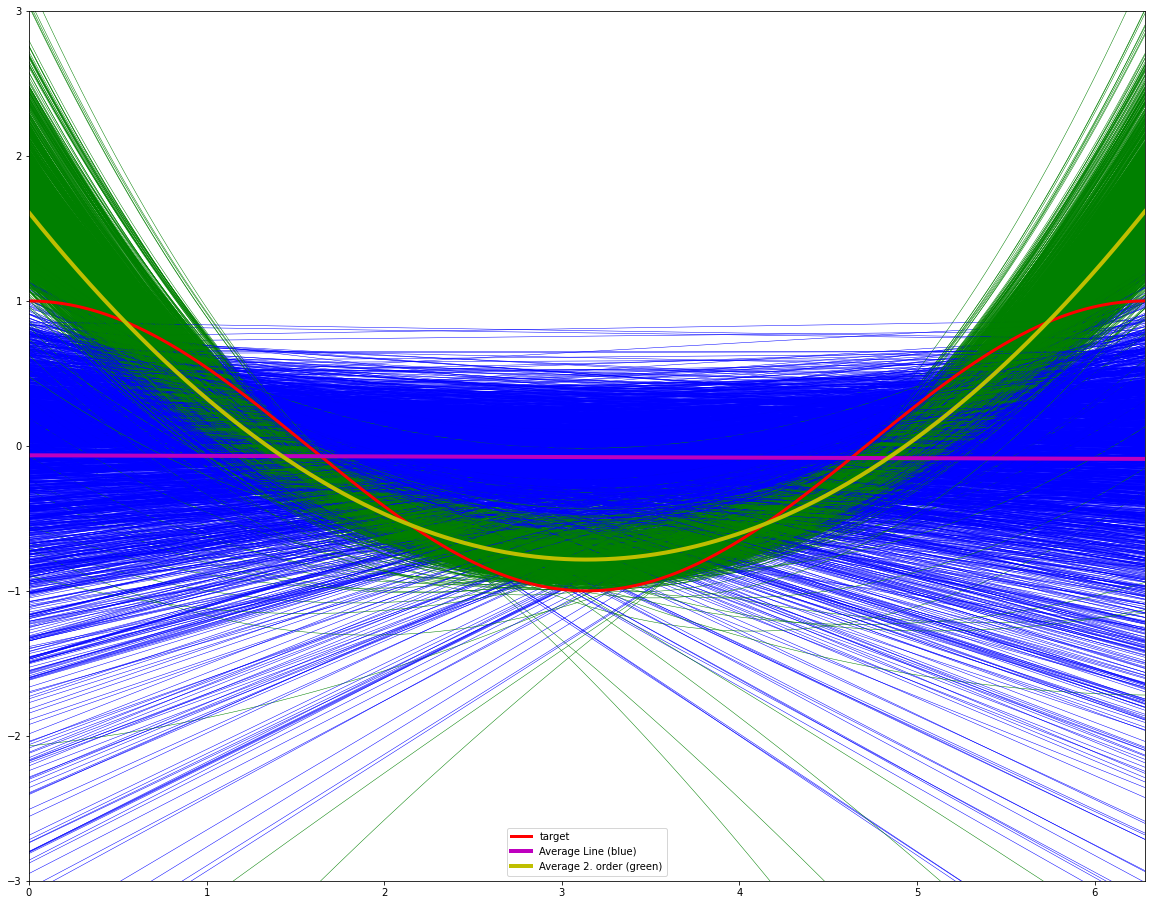

In [6]:
bias_var_exp(10)